---

<h1 align="center">Exploring Mental Health in the Tech Industry in 2016</h1>

> ### *Data:* 
   OSMI Mental Health in Tech Survey 2016
> ### *Describtion:*
   Currently over 1400 responses, the ongoing 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.
> ### *Source:*
   https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016

---

### A. Importing all the necessary libraries
It is of good practice to start with loading all the libraries that are needed troughout the analysis. 

In [2]:
import pandas as pd
import numpy as np
import html
import os
import matplotlib.pyplot as plt
import seaborn as sn

---

# 1. Question
#### In the tech sector, which factors are most common for team member attitudes about mental health?

We want to know what majority of tech workers feel or think about sharing their mental health issue (current or past)
with their employers. Do they think their mental health will affect their productivity?

# 2. Data

## 2.1 Loading the data and naming it
Reading the file containing our dataset and calling it into a pandas object (simple and intuitive name is prefered)

In [5]:
data = pd.read_csv("mental-heath-in-tech-2016_20161114.csv") # loading the data into notebook and naming it data

## 2.2 Displaying the data and intital visual inspection
Before proceeding any further it is necessary to have a glance at the dataset to see what does it look like.

In [6]:
data # just calling the name will return few rows and columns from the top and end of our table.

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


#### We have 63 columns (features, questions) and 1433 rows (values - candidates, who answered the questions)

In [7]:
type(data)

pandas.core.frame.DataFrame

## 2.3 Cleaning the Data

### 2.3.1 Renaming the columns to short names
Since most columns have really long names (the survey questions), it is a good idea to rplace them with short name, so it is easier and quicker to use them in codes.

In [8]:
data.columns # looking at all the culomn names (questions in the survey)

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [9]:
old_columns = data.columns # we have saved the original column names in an index for future reference.

In [10]:
old_columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [11]:
new_columns = ["self_employed", "number_of_employees", "company_in_tech", "role_in_tech", "company_mental_health",
                  "company_mental_health_options_awareness", "company_mental_health_discussion", "company_mental_health_resources", 
                   "company_mental_health_anonymity","company_mental_health_leave", "company_mental_health_discussion_impact", 
                   "company_physical_health_discussion_negative_impact", "mental_health_coworkers_discussion",
                   "mental_health_supervisor_discussion", "company_mental_health_serious", 
                   "company_mental_health_coworker_discussion_negative_impact", "mental_health_coverage", "mental_health_online_resources",
                  "mental_health_diagnosed_reveal", "mental_health_diagnosed_reveal_impact", "mental_health_diagnosed_coworker_reveal", 
                   "mental_health_diagnosed_coworker_reveal_impact_negative","mental_health_productivity_impact", 
                   "mental_health_productivity_impact_percent", "previous_companies", "previous_companies_mental_health_benefits", 
                   "previous_companies_mental_health_benefits_awareness","previous_companies_mental_health_discussion", 
                   "previous_companies_mental_health_resources", "previous_companies_mental_health_anonymity", 
                   "previous_companies_mental_health_discussion_negative_impact", 
                   "previous_companies_physical_health_discussion_negative_impact",
                  "previous_companies_mental_coworkers_health_discussion", "previous_companies_mental_supervisor_health_discussion", 
                   "previous_company_mental_health_serious", "previous_company_mental_health_coworker_discussion_negative_impact",
                  "future_company_physical_health_interview", "why/why_not", "future_company_mental_health_interview", "why/why_not2", 
                   "mental_health_negative_impact_career", "mental_health_negative_view_coworkers",
                  "mental_health_reveal_family&friends", "previous_and_current_company_mental_health_bad_response_experienced", 
                   "previous_and_current_company_mental_health_bad_response_experienced_others", "mental_health_family_history",
                  "mental_health_disorder_past", "mental_health_disorder_current", "yes:what_diagnosis", "maybe:what_diagnosis", 
                   "mental_health_disorder_professional_diagnosis","yes:condition_diagnosed", "mental_health_proffesional_treatment", 
                   "mental_health_treatment_affects_work", "mental_health_no_treatment_affects_work","age", "sex", "country_live", 
                   "live_us_territory", "country_work", "work_us_territory", "work_position", "remote"]

In [12]:
len(new_columns) #making sure we have the right number of new columns as the original

63

In [13]:
#putting the old and new columns side by side in a table for checking and future reference
old_new_columns = {"Old Column Names" : old_columns, "New Column Names" : new_columns}
old_new_columns = pd.DataFrame(old_new_columns)
old_new_columns

,Old Column Names,New Column Names
0,Are you self-employed?,self_employed
1,How many employees does your company or organi...,number_of_employees
2,Is your employer primarily a tech company/orga...,company_in_tech
3,Is your primary role within your company relat...,role_in_tech
4,Does your employer provide mental health benef...,company_mental_health
...,...,...
58,What US state or territory do you live in?,live_us_territory
59,What country do you work in?,country_work
60,What US state or territory do you work in?,work_us_territory
61,Which of the following best describes your wor...,work_position


In [14]:
old_new_columns

,Old Column Names,New Column Names
0,Are you self-employed?,self_employed
1,How many employees does your company or organi...,number_of_employees
2,Is your employer primarily a tech company/orga...,company_in_tech
3,Is your primary role within your company relat...,role_in_tech
4,Does your employer provide mental health benef...,company_mental_health
...,...,...
58,What US state or territory do you live in?,live_us_territory
59,What country do you work in?,country_work
60,What US state or territory do you work in?,work_us_territory
61,Which of the following best describes your wor...,work_position


In [15]:
data.columns = new_columns # replacing the old columns with new names

In [16]:
data # visual inspection that the colmn name change went trough alright

,self_employed,number_of_employees,company_in_tech,role_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,...,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,sex,country_live,live_us_territory,country_work,work_us_territory,work_position,remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


### 2.3.2 Cleaing the *sex* column

In [17]:
pd.set_option("display.max_rows", 70)
data.nunique().sort_values(ascending = False)
# to check if questions have received more unique answers than what they usually should

why/why_not                                                                   1085
why/why_not2                                                                  1080
work_position                                                                  264
yes:what_diagnosis                                                             128
yes:condition_diagnosed                                                        116
maybe:what_diagnosis                                                            99
sex                                                                             70
country_work                                                                    53
country_live                                                                    53
age                                                                             53
work_us_territory                                                               48
live_us_territory                                                               47
numb

The observation shows that the ***sex*** column has 70 unique values.  
While we now it is better to have only three categories for better analysis.  
Therefore we can extract all the unique values from sex column and re-assign them to male, female, other

In [18]:
data["sex"] = data["sex"].str.lower().str.strip()
# changing all the values in the column to lower case and removing spaces from values.

In [19]:
data.sex.unique() # all the 70 unique values in the sex column

array(['male', 'female', 'm', 'i identify as female.', 'bigender',
       'non-binary', 'female assigned at birth', 'f', 'woman', 'man',
       'fm', 'cis female', 'transitioned, m2f',
       'genderfluid (born female)', 'other/transfeminine',
       'female or multi-gender femme', 'female/woman', 'cis male',
       'male.', 'androgynous', 'male 9:1 female, roughly', nan,
       'male (cis)', 'other', 'nb masculine', 'cisgender female',
       'sex is male', 'none of your business', 'genderqueer', 'human',
       'genderfluid', 'enby', 'malr', 'genderqueer woman', 'mtf', 'queer',
       'agender', 'dude', 'fluid',
       "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field, though)',
       'unicorn', 'male (trans, ftm)', 'cis-woman', 'cisdude',
       'genderflux de

In [20]:
data.sex.unique() # returning all the unique values in the sex column

array(['male', 'female', 'm', 'i identify as female.', 'bigender',
       'non-binary', 'female assigned at birth', 'f', 'woman', 'man',
       'fm', 'cis female', 'transitioned, m2f',
       'genderfluid (born female)', 'other/transfeminine',
       'female or multi-gender femme', 'female/woman', 'cis male',
       'male.', 'androgynous', 'male 9:1 female, roughly', nan,
       'male (cis)', 'other', 'nb masculine', 'cisgender female',
       'sex is male', 'none of your business', 'genderqueer', 'human',
       'genderfluid', 'enby', 'malr', 'genderqueer woman', 'mtf', 'queer',
       'agender', 'dude', 'fluid',
       "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field, though)',
       'unicorn', 'male (trans, ftm)', 'cis-woman', 'cisdude',
       'genderflux de

In [21]:
# assigning all the possible male & female equivalents (from column sex) to new lists.
male = ["male", "m", "man", "male.", "androgynous", "male 9:1 female", "roughly", "male (cis)", "sex is male",
       "malr", "dude", "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
       "mail", "m|", "male/genderqueer", "male (trans, ftm)", "cisdude", "cis man"]

female = ["female", "i identify as female.", "female assigned at birth", "f", "woman", "fm", "cis female", "genderfluid (born female)", "female or multi-gender femme",
         "female/woman", "cisgender female", "genderqueer woman", "fem", "female (props for making this a freeform field, though)",
         "cis-woman", "genderflux demi-girl", "female-bodied; no feelings about gender", "transgender woman"]

other = list(data["sex"].value_counts().index)[2:]


In [22]:
male

['male',
 'm',
 'man',
 'male.',
 'androgynous',
 'male 9:1 female',
 'roughly',
 'male (cis)',
 'sex is male',
 'malr',
 'dude',
 "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
 'mail',
 'm|',
 'male/genderqueer',
 'male (trans, ftm)',
 'cisdude',
 'cis man']

In [23]:
female

['female',
 'i identify as female.',
 'female assigned at birth',
 'f',
 'woman',
 'fm',
 'cis female',
 'genderfluid (born female)',
 'female or multi-gender femme',
 'female/woman',
 'cisgender female',
 'genderqueer woman',
 'fem',
 'female (props for making this a freeform field, though)',
 'cis-woman',
 'genderflux demi-girl',
 'female-bodied; no feelings about gender',
 'transgender woman']

In [24]:
other

['m',
 'f',
 'woman',
 'man',
 'non-binary',
 'cis male',
 'genderqueer',
 'human',
 'agender',
 'male (cis)',
 'nonbinary',
 'androgynous',
 'cis female',
 'genderflux demi-girl',
 'other/transfeminine',
 'cisgender female',
 'unicorn',
 'female (props for making this a freeform field, though)',
 'female/woman',
 'cis man',
 'male 9:1 female, roughly',
 'cisdude',
 'female or multi-gender femme',
 'mtf',
 'mail',
 'malr',
 'male/genderqueer',
 'm|',
 'afab',
 'cis-woman',
 'fluid',
 'female assigned at birth',
 'dude',
 'none of your business',
 'transgender woman',
 'bigender',
 'other',
 'male.',
 'enby',
 'male (trans, ftm)',
 'nb masculine',
 'sex is male',
 'fem',
 "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
 'genderfluid (born female)',
 'female-bodied; no feelings about gender',
 'genderqueer woman',
 'queer',
 'transitioned, m2f',
 'i identify as female.',
 'gend

In [25]:
# Replacing variants with male, female, other.
data["sex"] = data["sex"].replace(male, "male")

data["sex"] = data["sex"].replace(female, "female")

data["sex"] = data["sex"].replace(other, "other")


In [26]:
data.sex.unique() # checking that replacement has worked

array(['male', 'female', 'other', nan], dtype=object)

In [27]:
data.sex.nunique()

3

In [28]:
sex_values = data.sex.value_counts().sort_values(ascending=False).to_frame().reset_index()
sex_values.columns = ["Sex", "Count"]
sex_values

,Sex,Count
0,male,1057
1,female,344
2,other,29


 Now we can use the ***sex*** column in future analysis

### 2.3.3 Removing outliers from *age* column

In [29]:
data.age.describe() # to see a summary of data in  the column

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

 Although the average age seems alright, there are some extremes at both ends.  
 We can solve this in two ways: 
 1. Removing outliers by filtering the age column for a set min. and max. (risk loosing some data)
 2. replacing the outliers value with the mean value (keeping all the data)

In [30]:
# Calculating the mean age (excluding the outliers)
age_mean = data[(data["age"] >= 18) | (data["age"] <= 75)]["age"].mean()
age_mean

34.28611304954641

In [31]:
# Replacing the outliers with mean
data["age"].replace(to_replace = data[(data["age"] < 18) | (data["age"] > 75)]
                    ["age"].tolist(), value = age_mean, inplace = True)

In [32]:
data.age.describe() # checking that replacement has worked.

count    1433.000000
mean       34.086832
std         8.072152
min        19.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

### 2.3.4 Finding and dealing with NaN (missing, not valid) values

In [33]:
data.isna()

,self_employed,number_of_employees,company_in_tech,role_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,...,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,sex,country_live,live_us_territory,country_work,work_us_territory,work_position,remote
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1429,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1430,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# Finding the number of NaNs in each column.
data.isna().sum().sort_values(ascending = False)

mental_health_diagnosed_reveal_impact                                         1289
mental_health_productivity_impact_percent                                     1229
role_in_tech                                                                  1170
mental_health_online_resources                                                1146
mental_health_coverage                                                        1146
mental_health_productivity_impact                                             1146
mental_health_diagnosed_coworker_reveal_impact_negative                       1146
mental_health_diagnosed_coworker_reveal                                       1146
mental_health_diagnosed_reveal                                                1146
maybe:what_diagnosis                                                          1111
yes:what_diagnosis                                                             865
previous_and_current_company_mental_health_bad_response_experienced_others     776
yes:

##### We see that in some columns there are many Nan values, rendering those columns almost useless (or at least tricky to use)

In [35]:
# We can remove the columns whre more than half of their values are NaN
total_nan_columns = (data.isna().sum() >= data.shape[0]/2).tolist()
total_nan_columns

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [36]:
nan_columns = data.columns[total_nan_columns]
nan_columns

Index(['role_in_tech', 'mental_health_coverage',
       'mental_health_online_resources', 'mental_health_diagnosed_reveal',
       'mental_health_diagnosed_reveal_impact',
       'mental_health_diagnosed_coworker_reveal',
       'mental_health_diagnosed_coworker_reveal_impact_negative',
       'mental_health_productivity_impact',
       'mental_health_productivity_impact_percent',
       'previous_and_current_company_mental_health_bad_response_experienced_others',
       'yes:what_diagnosis', 'maybe:what_diagnosis',
       'yes:condition_diagnosed'],
      dtype='object')

In [37]:
dropped_columns = []
for column in nan_columns:
    dropped_columns.append(column)

In [38]:
dropped_columns

['role_in_tech',
 'mental_health_coverage',
 'mental_health_online_resources',
 'mental_health_diagnosed_reveal',
 'mental_health_diagnosed_reveal_impact',
 'mental_health_diagnosed_coworker_reveal',
 'mental_health_diagnosed_coworker_reveal_impact_negative',
 'mental_health_productivity_impact',
 'mental_health_productivity_impact_percent',
 'previous_and_current_company_mental_health_bad_response_experienced_others',
 'yes:what_diagnosis',
 'maybe:what_diagnosis',
 'yes:condition_diagnosed']

In [39]:
len(dropped_columns)

13

In [40]:
# Removing all the columns with more than half the values NaN.
data.drop(labels = nan_columns, axis =1, inplace =True)

In [41]:
data

,self_employed,number_of_employees,company_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,company_mental_health_discussion_impact,...,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,sex,country_live,live_us_territory,country_work,work_us_territory,work_position,remote
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39.0,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29.0,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38.0,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43.0,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43.0,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34.0,female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56.0,male,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,Rarely,Sometimes,52.0,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,...,Sometimes,Often,30.0,female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [42]:
data.columns.to_list()

['self_employed',
 'number_of_employees',
 'company_in_tech',
 'company_mental_health',
 'company_mental_health_options_awareness',
 'company_mental_health_discussion',
 'company_mental_health_resources',
 'company_mental_health_anonymity',
 'company_mental_health_leave',
 'company_mental_health_discussion_impact',
 'company_physical_health_discussion_negative_impact',
 'mental_health_coworkers_discussion',
 'mental_health_supervisor_discussion',
 'company_mental_health_serious',
 'company_mental_health_coworker_discussion_negative_impact',
 'previous_companies',
 'previous_companies_mental_health_benefits',
 'previous_companies_mental_health_benefits_awareness',
 'previous_companies_mental_health_discussion',
 'previous_companies_mental_health_resources',
 'previous_companies_mental_health_anonymity',
 'previous_companies_mental_health_discussion_negative_impact',
 'previous_companies_physical_health_discussion_negative_impact',
 'previous_companies_mental_coworkers_health_discussion'

### 2.3.5 Changing column types to categorical


By looking at the data we see that only the ***age*** column is numerical and other columns contain categircal values.     
Columns (questions) with only few possible answer can be changed to categorical datatype.

In [43]:
for column in data.columns:
    if column != "age":
        data[column] = data[column].astype("category")

In [44]:
data.dtypes

self_employed                                                          category
number_of_employees                                                    category
company_in_tech                                                        category
company_mental_health                                                  category
company_mental_health_options_awareness                                category
company_mental_health_discussion                                       category
company_mental_health_resources                                        category
company_mental_health_anonymity                                        category
company_mental_health_leave                                            category
company_mental_health_discussion_impact                                category
company_physical_health_discussion_negative_impact                     category
mental_health_coworkers_discussion                                     category
mental_health_supervisor_discussion     

## 3. Analysis

### 3.1 Aggregation

The first analysis can involve aggregating the data based on the ***sex*** column.

In [45]:
data_grouped = data.groupby("sex") #grouping the data based on the gender values.

In [46]:
data_grouped.mean() # to see and compare the average age of the participants by gender

,age
sex,
female,34.587209
male,34.037980
other,30.871935


We see that the average age for both male and female participants is 34. This shows that sex column is reliable and can be used for further analysis.

In [47]:
data.columns.sort_values()

Index(['age', 'company_in_tech', 'company_mental_health',
       'company_mental_health_anonymity',
       'company_mental_health_coworker_discussion_negative_impact',
       'company_mental_health_discussion',
       'company_mental_health_discussion_impact',
       'company_mental_health_leave',
       'company_mental_health_options_awareness',
       'company_mental_health_resources', 'company_mental_health_serious',
       'company_physical_health_discussion_negative_impact', 'country_live',
       'country_work', 'future_company_mental_health_interview',
       'future_company_physical_health_interview', 'live_us_territory',
       'mental_health_coworkers_discussion', 'mental_health_disorder_current',
       'mental_health_disorder_past',
       'mental_health_disorder_professional_diagnosis',
       'mental_health_family_history', 'mental_health_negative_impact_career',
       'mental_health_negative_view_coworkers',
       'mental_health_no_treatment_affects_work',
       'ment

## 4. Visualisation

### 4.1 Past history of mental health from gender-age point of view

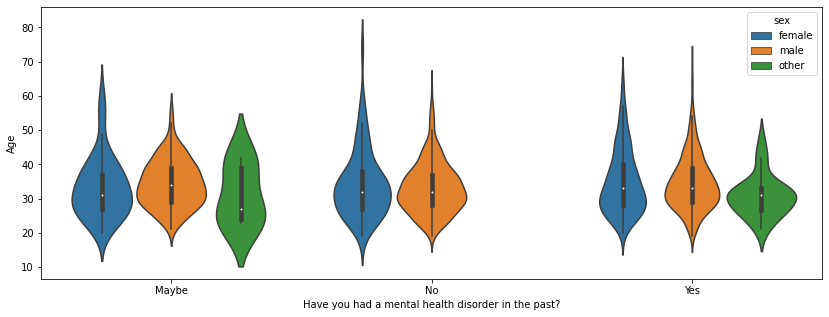

In [48]:
plt.figure(figsize=(14, 5))
sn.violinplot(data = data, y="age", x="mental_health_disorder_past", hue="sex", inner = "box")
plt.ylabel("Age")
plt.xlabel(old_new_columns.iloc[46,0])
plt.show()

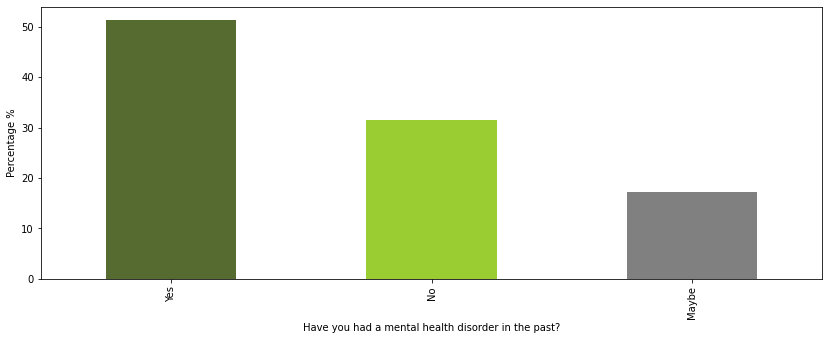

In [49]:
plt.figure(figsize=(14, 5))
(data["mental_health_disorder_past"].value_counts(normalize=True) * 100).plot(kind='bar',
                                                                              color = ["darkolivegreen", "yellowgreen", "grey"])
plt.ylabel("Percentage %")
plt.xlabel(old_new_columns.iloc[46,0])
plt.show()

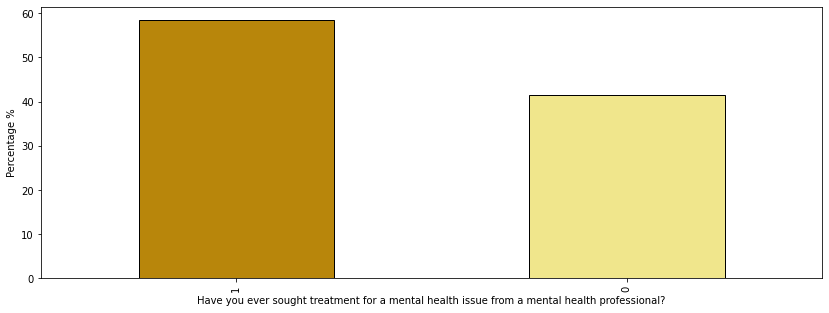

In [50]:
plt.figure(figsize=(14, 5))
(data["mental_health_proffesional_treatment"].value_counts(normalize=True) * 100).plot(kind="bar",
                                                                                       color = ["darkgoldenrod", "khaki"], edgecolor = "black")
plt.ylabel("Percentage %")
plt.xlabel(old_new_columns.iloc[52,0])
plt.show()

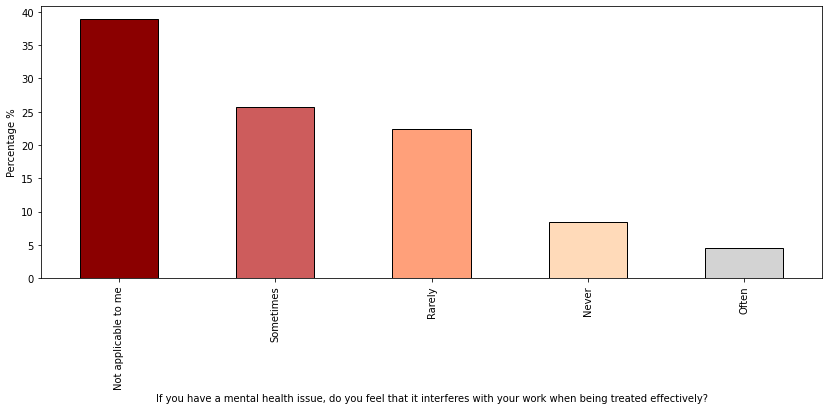

In [51]:
plt.figure(figsize=(14, 5))
(data["mental_health_treatment_affects_work"].value_counts(normalize=True) * 100).plot(kind="bar",
                                                                                       color = ["darkred", "indianred", "lightsalmon", "peachpuff", "lightgrey"],
                                                                                      edgecolor = "black")
plt.ylabel("Percentage %")
plt.xlabel(old_new_columns.iloc[53,0])
plt.show()

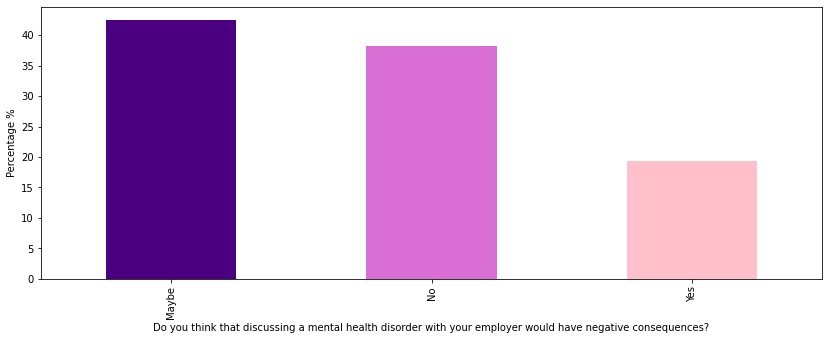

In [52]:
plt.figure(figsize=(14, 5))
(data["company_mental_health_discussion_impact"].value_counts(normalize=True) * 100).plot(kind="bar",
                                                                                         color = ["indigo", "orchid", "pink"])
plt.ylabel("Percentage %")
plt.xlabel(old_new_columns.iloc[10,0])
plt.show()

This graph shows that although around 35% of employees feel confident about revealing their mental health issues with their employers, majority of the surveyed people (over 40%) are not sure. This can lead to employees hide their mental health issue and giving that it is a prevalent health concern (see graphs before) this can leave the employes untreated or neglected.

## 5. Insight

The analysis shows that around 60% of participants reported a mental health issue in the past. However around 15% were reluctant to answer this question. The distribution of past mental health seems to be unifrom among the male and frmale workers with almost the same frequency. Non-binary gender participants are reporting significantly higher past mental issues. This could be either these people are more open and self-councsious about themselves or that society-induced pressures has a role.
In regard to bein open to employers around 35% of employees feel confident about revealing their mental health issues, but majority of the surveyed people (over 40%) are not sure. This can lead to employees hide their mental health issue and giving that it is a prevalent health concern (see graphs before) this can leave the employees untreated or neglected.
In general, I conclude that mental health is an issue of concern among tech workers and employers need to specifically address this by removing negative stigma from workplace and ensuring their employees that they will not be negatively judged if they seek treatment.

---

<h1 align="center">A Million News Headlines</h1>

> ### *Data:* 
   A Million News Headlines
> ### *Describtion:*
   News headlines published over a period of 19 Years
> ### *Source:*
   https://www.kaggle.com/datasets/therohk/million-headlines

### A. Importing all the necessary libraries
It is of good practice to start with loading all the libraries that are needed troughout the analysis. 

In [53]:
import pandas as pd
import numpy as np
import html
import os
import matplotlib.pyplot as plt
import seaborn as sn
import collections
import nltk
from nltk.corpus import stopwords
from collections import Counter

### B. Setting up work directory

In [54]:
os.getcwd() # to see what is set as current working directory

'/Users/amir/Documents/ifq619'

In [55]:
# changing the work directory to another folder
os.chdir('/Users/amir/Documents/ifq619') # this folder should contain all the files we are working on for this project

# 1. Question
#### What can the headlines from the Australian national broadcaster (the ABC) tell us about the concerns of the Australian public over time?


Using this dataset we want to know what are the most common words in the news headlines from 2003 until the end of 2021.

# 2. Data

## 2.1 Loading the data and naming it
Reading the file containing our dataset and calling it into a pandas object (simple and intuitive name is prefered)

In [56]:
headlines = pd.read_csv("abcnews-date-text.csv")

## 2.2 Displaying the data and intital visual inspection
Before proceeding any further it is necessary to have a glance at the dataset to see what does it look like.

In [57]:
headlines # just calling the name will return few rows and columns from the top and end of our table.

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


We see that there only two columns and many many rows (good for analysis)

In [58]:
headlines.shape

(1244184, 2)

In [59]:
# check if the columns are of the right data type.
headlines.dtypes

publish_date      int64
headline_text    object
dtype: object

The column ***publish_date*** is actually a date entry but is stored as integer.
We can ask pandas to pars the date from this column and turn it to datetime type.

In [60]:
# importing the dataset again with pars_dates argument.
headlines = pd.read_csv("abcnews-date-text.csv", parse_dates=["publish_date"])

In [61]:
headlines.dtypes

publish_date     datetime64[ns]
headline_text            object
dtype: object

In [62]:
# lets check if there are any empty headlines
headlines.isnull().any().sum()

0

In [63]:
#checking for duplicated values within the headlines column
headlines.duplicated().sum()

2

In [64]:
headlines[headlines.duplicated()]

,publish_date,headline_text
1232754,2021-03-01,house prices record sharpest increase since 2003
1237050,2021-06-01,house prices reach record levels; as investors


visual inspection shows that these two headlines are not quite the same and they are three months apart.
Therefore we treat them as not duplicates.

# 3. Analysis

## 3.1 Articles length

<AxesSubplot:>

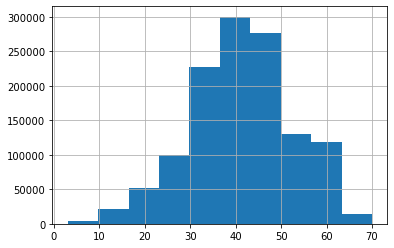

In [65]:
#checking to see how long the headlines are. The number of letters.
headlines["headline_text"].str.len().hist()

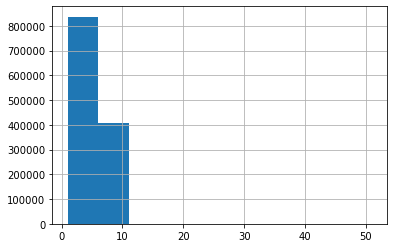

In [66]:
#checking to see the average number of words for article
headlines["headline_text"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

## 3.2 Extracting Date Elements

Since we want to analyse the frequency of words over the years, it is a good idea to extract the year, month and day of each article into seperate columns.

In [67]:
headlines["Year"] = headlines["publish_date"].dt.year
headlines["Month"] = headlines["publish_date"].dt.month
headlines["Day"] = headlines["publish_date"].dt.day


In [68]:
headlines.head()

,publish_date,headline_text,Year,Month,Day
0,2003-02-19,aba decides against community broadcasting lic...,2003,2,19
1,2003-02-19,act fire witnesses must be aware of defamation,2003,2,19
2,2003-02-19,a g calls for infrastructure protection summit,2003,2,19
3,2003-02-19,air nz staff in aust strike for pay rise,2003,2,19
4,2003-02-19,air nz strike to affect australian travellers,2003,2,19


In [69]:
# we do not need the original publish_date.
headlines.drop("publish_date", axis =1, inplace= True)

In [70]:
headlines.dtypes

headline_text    object
Year              int64
Month             int64
Day               int64
dtype: object

In [71]:
headlines.set_index("Year")

,headline_text,Month,Day
Year,,,
2003,aba decides against community broadcasting lic...,2,19
2003,act fire witnesses must be aware of defamation,2,19
2003,a g calls for infrastructure protection summit,2,19
2003,air nz staff in aust strike for pay rise,2,19
2003,air nz strike to affect australian travellers,2,19
...,...,...,...
2021,two aged care residents die as state records 2...,12,31
2021,victoria records 5;919 new cases and seven deaths,12,31
2021,wa delays adopting new close contact definition,12,31


### 3.3 Aggregating data

To be able to analyse the data for month and day seperately we need to creat new dataframes from original data by grouping them based on the month and day.

In [72]:
month_grouped = headlines.groupby(["Month"])["headline_text"].count()
day_grouped = headlines.groupby(["Day"])["headline_text"].count()

In [73]:
year_grouped = headlines.groupby(["Year"])["headline_text"].count()

In [74]:
month_grouped

Month
1      92912
2      99175
3     111187
4     102740
5     109513
6     104643
7     108031
8     110313
9      99958
10    105620
11    104854
12     95238
Name: headline_text, dtype: int64

In [75]:
day_grouped

Day
1     39954
2     40018
3     40346
4     40603
5     40492
6     40081
7     41190
8     41268
9     40724
10    41244
11    41423
12    41036
13    41037
14    41389
15    41891
16    41563
17    41582
18    41467
19    41577
20    41570
21    41666
22    41981
23    41701
24    41101
25    39058
26    39465
27    40418
28    40255
29    37780
30    37223
31    23081
Name: headline_text, dtype: int64

In [76]:
year_grouped

Year
2003    63997
2004    72674
2005    73124
2006    66901
2007    77174
2008    79991
2009    76444
2010    74931
2011    77778
2012    89008
2013    91928
2014    81531
2015    77290
2016    61574
2017    47511
2018    40102
2019    34060
2020    40240
2021    17926
Name: headline_text, dtype: int64

### 3.4 Most common words

For getting the most common words we will run into a problem as preposition words are the most common words and we do not want them.
Therefore for filtering them we use function remove_stopwords

In [77]:
common_words =Counter(" ".join(headlines["headline_text"].str.lower()).split()).most_common(100)

In [78]:
common_words

[('to', 238375),
 ('in', 156175),
 ('for', 143272),
 ('of', 95940),
 ('on', 82014),
 ('the', 65048),
 ('over', 54527),
 ('police', 39813),
 ('at', 36887),
 ('with', 36331),
 ('after', 34641),
 ('new', 33729),
 ('a', 31148),
 ('man', 30627),
 ('and', 30069),
 ('as', 24333),
 ('says', 23731),
 ('from', 23440),
 ('up', 22872),
 ('by', 21375),
 ('us', 20370),
 ('out', 19117),
 ('be', 18199),
 ('court', 18180),
 ('govt', 17091),
 ('australia', 17071),
 ('council', 16955),
 ('more', 16775),
 ('nsw', 16516),
 ('not', 15560),
 ('fire', 15512),
 ('interview', 15426),
 ('australian', 13632),
 ('wa', 13464),
 ('sydney', 13065),
 ('plan', 12993),
 ('water', 12850),
 ('death', 12749),
 ('qld', 12590),
 ('into', 12477),
 ('crash', 12356),
 ('health', 11967),
 ('off', 11913),
 ('against', 11438),
 ('back', 11221),
 ('charged', 11193),
 ('no', 11142),
 ('down', 10661),
 ('is', 10631),
 ('murder', 10529),
 ('report', 10413),
 ('sa', 10386),
 ('day', 10329),
 ('call', 10013),
 ('government', 9988),
 ('a

In [79]:
common_words = pd.DataFrame(common_words, columns = ["Word", "Count"])

In [80]:
pd.set_option("display.max_rows", 100)
common_words

,Word,Count
0,to,238375
1,in,156175
2,for,143272
3,of,95940
4,on,82014
5,the,65048
6,over,54527
7,police,39813
8,at,36887
9,with,36331


In [81]:
common_words = common_words.sort_values(by = "Count", ascending = False)

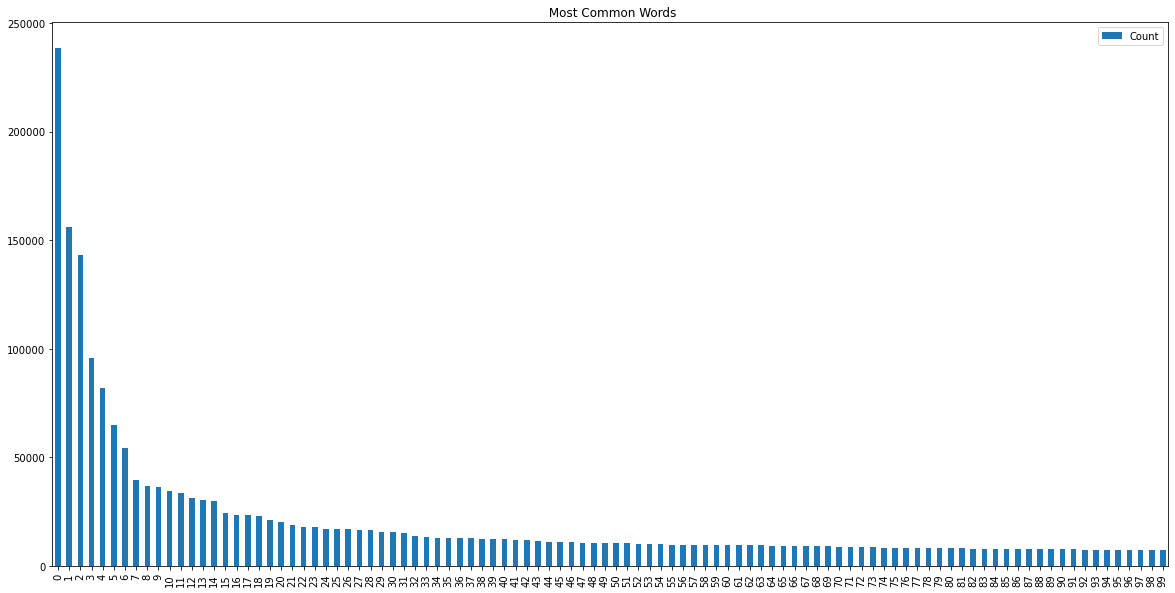

In [82]:
common_words.plot(kind="bar", figsize=(20,10),title=" Most Common Words")
plt.show()

Since most of the frequent words are preposition word, we can manually select words that are valuable for our analysis.

In [83]:
common_words_2 = common_words.iloc[[7,23,24,25,26,28,30,31,32,33,34,35,36,37,38,40,41,45,49,51,54,56,57,59,
                  60,63,65,66,71,72,73,75,77,78,79,80,81,82,86,89,95,96,97,98,99],]

In [84]:
common_words_2 = common_words_2.reset_index(drop = True)
common_words_2

,Word,Count
0,police,39813
1,court,18180
2,govt,17091
3,australia,17071
4,council,16955
5,nsw,16516
6,fire,15512
7,interview,15426
8,australian,13632
9,wa,13464


Some words are repeated twice with different variant (govt:government, qld:queensland).
We need to merge their counts under one word.

In [85]:
common_words.iloc[2,1] = common_words.iloc[2,1] + common_words.iloc[20,1]
common_words.iloc[14,1] = common_words.iloc[14,1] + common_words.iloc[39,1]

In [86]:
# and now we can delet the duplicate rows:
common_words.drop(labels=[20,39], axis=0, inplace = True)

In [87]:
common_words_2 = common_words_2.sort_values(by = "Count", ascending = False)

In [88]:
headlines.set_index("Year", inplace = True)

# 4. Visualisation

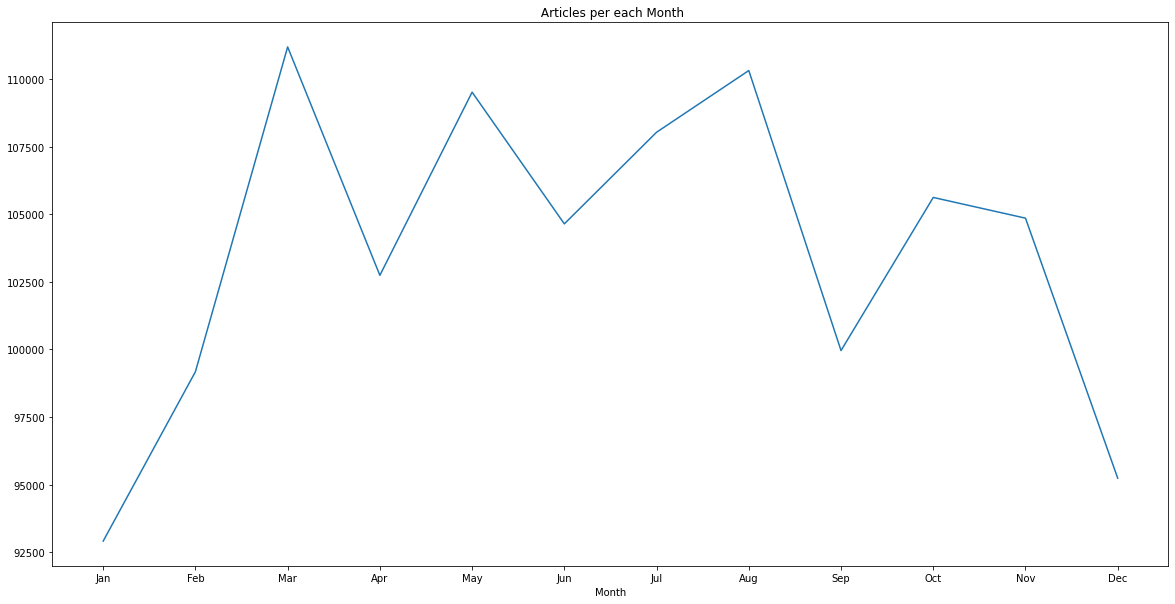

In [89]:
# Plotting the number of articles for each month of the year (2003-2021)
Mf = pd.Series(month_grouped)
Mf.plot(kind="line", figsize=(20,10),title=" Articles per each Month")
plt.xticks(np.arange(1,13,1), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
                                      "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

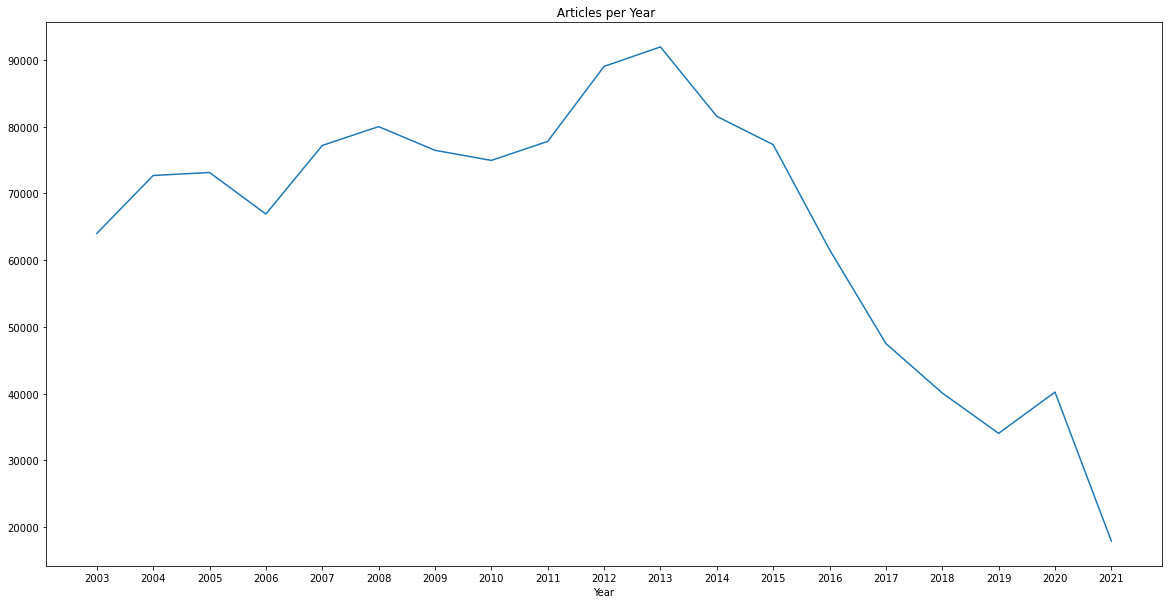

In [90]:
# Plotting the number of articles for each year (2003-2021)

Yf = pd.Series(year_grouped)
Yf.plot(kind="line", figsize=(20,10),title=" Articles per Year")
plt.xticks(year_grouped.index)
plt.show()

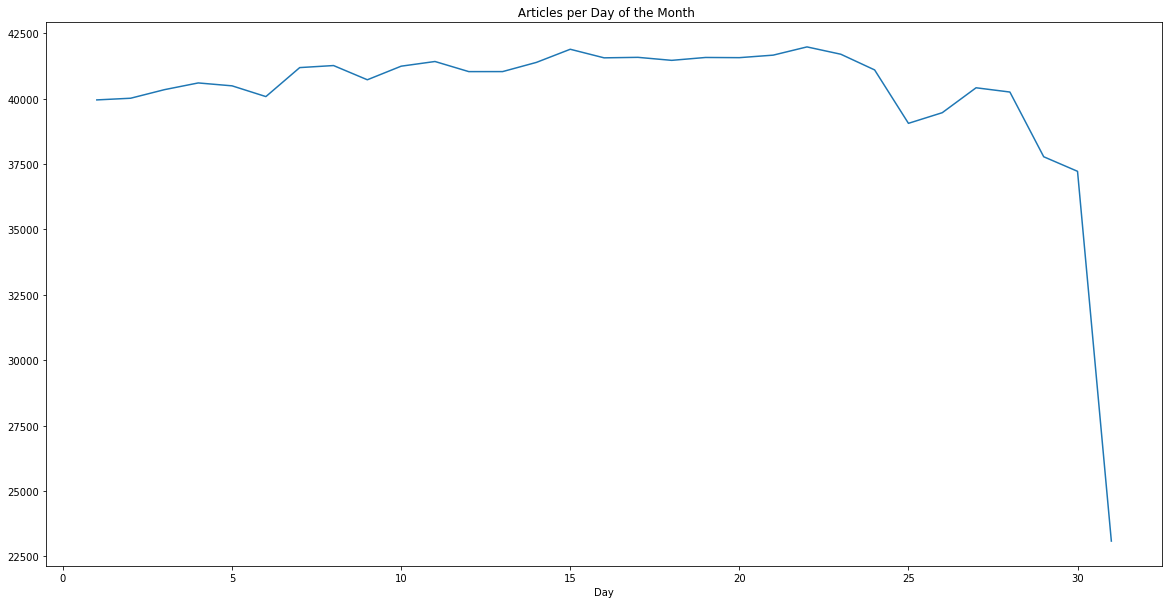

In [91]:
# Plotting the number of articles for each day of the month (2003-2021)
Df = pd.Series(day_grouped)
Df.plot(kind="line", figsize=(20,10),title=" Articles per Day of the Month")
plt.show()

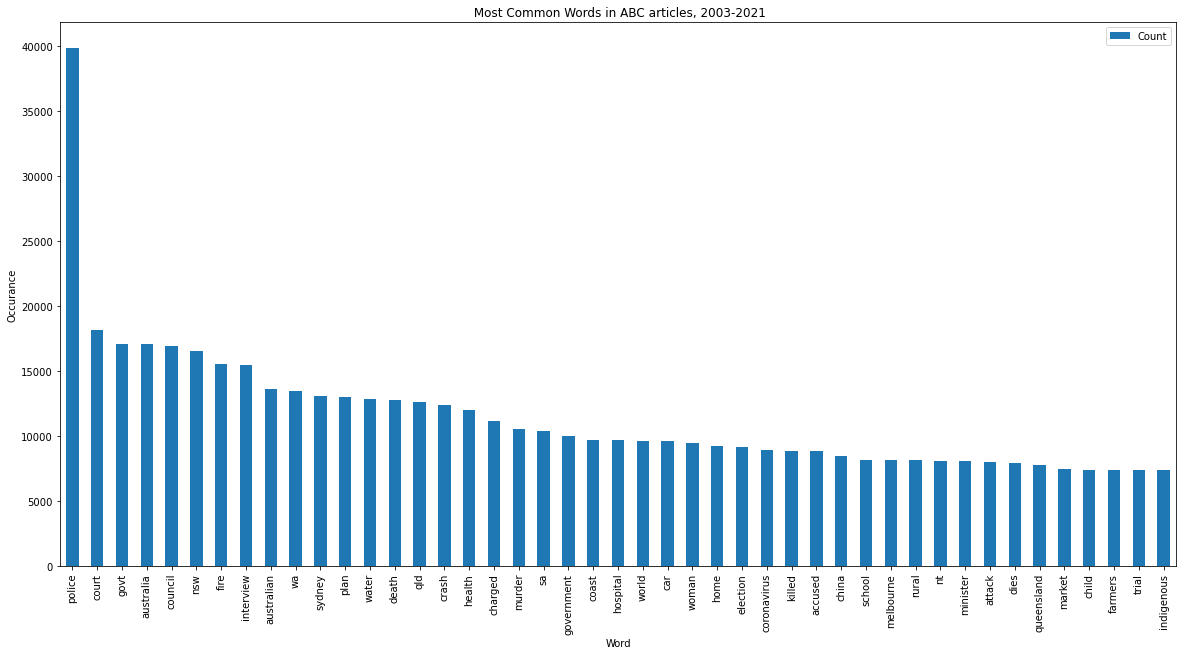

In [92]:
# plotting the number of occurance for most common words over a period of 19 years
common_words_2.plot(kind="bar",  x= "Word", figsize=(20,10),title=" Most Common Words in ABC articles, 2003-2021")
plt.ylabel("Occurance")
plt.show()

# 5. Insight

From this analysis I tried to find out what are most topics discussed in ABC articles over a period of 19 years. The analysis shows that, in general, March sees the most number of articles published, while from December to Feburary next year, the number of published title plumet significantly. This could be assigned to the holiday season factor. In regard to days of the month, there is a uniform distribution of articles per each day, except for the last few days when there is a bit less articles published.
The major change in areticle numbers is documented in yearly analysis. Although the total number of titles were increasing from 2003 until 2013, a sharp decline from then saw the number of articles shrink by two third in 2019.
Analysis shows that first few most common words are related to police operations. I hope I am wrong and this is not a reflection of the bias in ABC toward special type of news. Fire also appears on the top list, and this is predictable after two years of devestating bush fires across the country.